**Problem statement:** 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [6]:

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,Rescaling


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2155
118


## **Load using keras.preprocessing**
Let's load these images off disk using the helpful image_dataset_from_directory utility.

## **Create a dataset**
Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:

## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels = "inferred",
  label_mode = "categorical",
  color_mode = "rgb",
  batch_size = batch_size,
  image_size = (img_width,img_height),
  seed = 123,
  subset = "training",
  validation_split = 0.2
  
)

Found 2155 files belonging to 9 classes.
Using 1724 files for training.


In [12]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels = "inferred",
  label_mode = "categorical",
  color_mode = "rgb",
  batch_size = batch_size,
  image_size = (img_width,img_height),
  seed = 123,
  subset = "validation",
  validation_split = 0.2
  
)

Found 2155 files belonging to 9 classes.
Using 431 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## **Visualize the data**
Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [14]:
import matplotlib.pyplot as plt

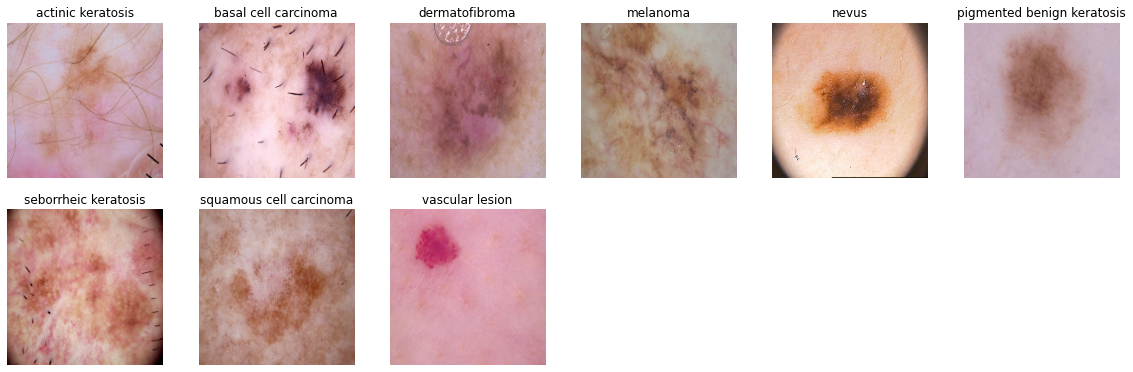

In [15]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(2):
  for j in range(len(class_names)):
    ax = plt.subplot(6, 6, j + 1)
    for i in range(batch_size):
         if(class_names[np.argmax(labels[i])]==class_names[j]):         
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[np.argmax(labels[i])])
            plt.axis("off")
            break
plt.show()        

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.



In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Create the model**
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [17]:
# model architecture
model = Sequential()
model.add(Rescaling(scale=1./255,input_shape=(img_width,img_height,3)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(len(class_names)))
model.add(Activation('softmax'))


## **Compile the model**
Choose an appropirate optimiser and loss function for model training

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

## **Train the model**

In [19]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
54/54 [==============================] - 180s 721ms/step - loss: 1.9233 - accuracy: 0.2947 - val_loss: 1.8900 - val_accuracy: 0.3248
Epoch 2/20
54/54 [==============================] - 1s 21ms/step - loss: 1.6072 - accuracy: 0.4368 - val_loss: 1.6051 - val_accuracy: 0.3852
Epoch 3/20
54/54 [==============================] - 1s 20ms/step - loss: 1.4370 - accuracy: 0.5035 - val_loss: 1.4161 - val_accuracy: 0.5197
Epoch 4/20
54/54 [==============================] - 1s 20ms/step - loss: 1.3762 - accuracy: 0.5360 - val_loss: 1.4917 - val_accuracy: 0.4780
Epoch 5/20
54/54 [==============================] - 1s 21ms/step - loss: 1.2470 - accuracy: 0.5632 - val_loss: 1.3888 - val_accuracy: 0.5313
Epoch 6/20
54/54 [==============================] - 1s 20ms/step - loss: 1.1649 - accuracy: 0.5800 - val_loss: 1.3401 - val_accuracy: 0.5638
Epoch 7/20
54/54 [==============================] - 1s 20ms/step - loss: 1.1360 - accuracy: 0.6102 - val_loss: 1.4887 - val_accuracy: 0.5104
Epoch 8/20

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 activation (Activation)     (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 90, 90, 32)        0         
                                                        

## **Visualizing training results**

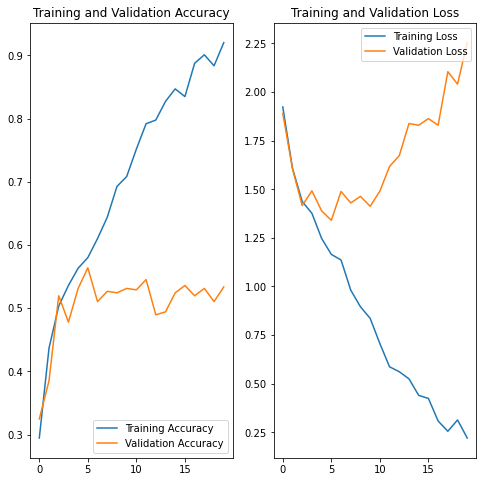

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Observations:**

Clearly we can see that there is overfitting as training data accuracy is way more than validation accuracy.

## **Data Augmentation:**



In [22]:
#after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
augmentation= Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

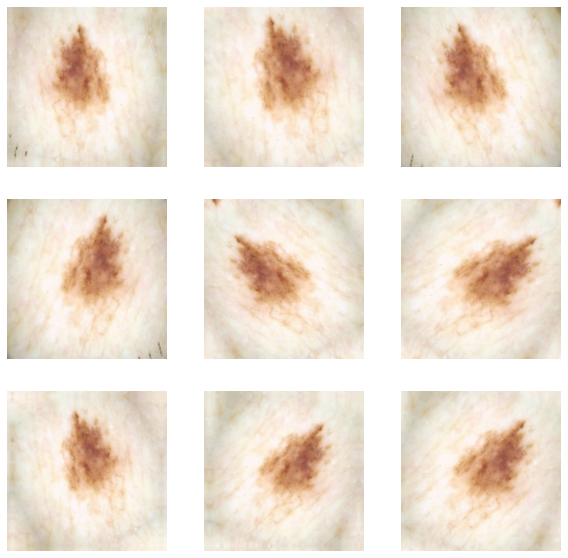

In [23]:
#visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(len(class_names)) :
    agumented_images=augmentation(images)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(agumented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## **Create the model**

In [24]:
# model architecture
model = Sequential()

model.add(augmentation)

model.add(Rescaling(scale=1./255,input_shape=(img_width,img_height,3)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(len(class_names)))
model.add(Activation('softmax'))


## **Compiling the model**

In [25]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **Training the model**

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


54/54 [==============================] - 13s 168ms/step - loss: 1.9885 - accuracy: 0.2680 - val_loss: 1.8164 - val_accuracy: 0.3364
Epoch 2/20
54/54 [==============================] - 8s 140ms/step - loss: 1.7321 - accuracy: 0.3776 - val_loss: 1.6414 - val_accuracy: 0.4084
Epoch 3/20
54/54 [==============================] - 9s 167ms/step - loss: 1.5163 - accuracy: 0.4739 - val_loss: 1.5304 - val_accuracy: 0.5012
Epoch 4/20
54/54 [==============================] - 8s 153ms/step - loss: 1.5082 - accuracy: 0.4762 - val_loss: 1.4502 - val_accuracy: 0.4896
Epoch 5/20
54/54 [==============================] - 8s 154ms/step - loss: 1.3646 - accuracy: 0.5133 - val_loss: 1.7280 - val_accuracy: 0.4292
Epoch 6/20
54/54 [==============================] - 9s 167ms/step - loss: 1.3793 - accuracy: 0.5070 - val_loss: 1.4570 - val_accuracy: 0.4872
Epoch 7/20
54/54 [==============================] - 7s 138ms/step - loss: 1.2823 - accuracy: 0.5522 - val_loss: 1.3903 - val_accuracy: 0.5244
Epoch 8/20
54/54

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

### **Visualizing the results**

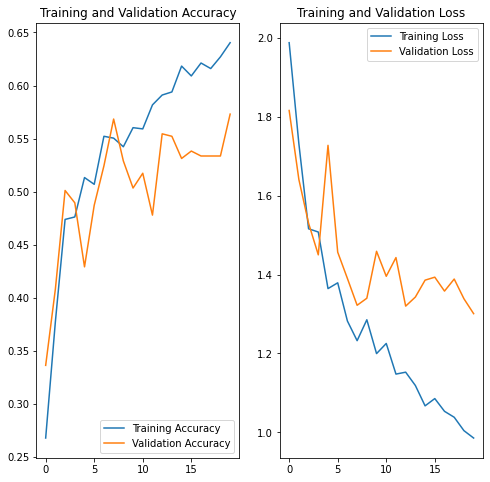

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations:

Even though we are able to decrease the difference between validation and training accuracy. The above results shows that model is clearly underfitting.
 



**Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [29]:
data = []
for folder in sorted(os.listdir('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration')):
  if folder!='.git' and folder != "Test":
    for subfolder in sorted(os.listdir('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/'+folder)):
      for file in sorted(os.listdir('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/'+folder+"/"+subfolder)):
        data.append((subfolder, '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/'+folder+"/"+subfolder+"/"+file))

original_df = pd.DataFrame(data, columns=['Label', 'Path'])
print (original_df)

                  Label                                               Path
0     actinic keratosis  /content/drive/MyDrive/Skin cancer ISIC The In...
1     actinic keratosis  /content/drive/MyDrive/Skin cancer ISIC The In...
2     actinic keratosis  /content/drive/MyDrive/Skin cancer ISIC The In...
3     actinic keratosis  /content/drive/MyDrive/Skin cancer ISIC The In...
4     actinic keratosis  /content/drive/MyDrive/Skin cancer ISIC The In...
...                 ...                                                ...
2219    vascular lesion  /content/drive/MyDrive/Skin cancer ISIC The In...
2220    vascular lesion  /content/drive/MyDrive/Skin cancer ISIC The In...
2221    vascular lesion  /content/drive/MyDrive/Skin cancer ISIC The In...
2222    vascular lesion  /content/drive/MyDrive/Skin cancer ISIC The In...
2223    vascular lesion  /content/drive/MyDrive/Skin cancer ISIC The In...

[2224 rows x 2 columns]


Class=0 , n=114 (5.13%)
Class=1 , n=378 (17.00%)
Class=2 , n=95 (4.27%)
Class=3 , n=438 (19.69%)
Class=4 , n=357 (16.05%)
Class=5 , n=445 (20.01%)
Class=6 , n=77 (3.46%)
Class=7 , n=181 (8.14%)
Class=8 , n=139 (6.25%)


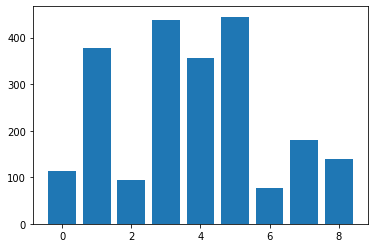

In [30]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X,y=original_df['Path'],original_df["Label"]

y=LabelEncoder().fit_transform(y)

counter=Counter(y)

# Distribution Summary

for label,count in counter.items():
  percentage= count/len(y) *100
  print("Class=%d , n=%d (%.2f%%)" % (label,count,percentage))

# Class distribution plot

plt.bar(counter.keys(), counter.values())
plt.show()

**Observations:**
1. From the above we can see that class-6 has least number of samples.
2. class-5,class-3,class-1 and class-4 dominate the data in terms of proportionate number of samples with  around 60% combined.

## **Rectifying the class imbalance**

**Todo:** Rectify the class imbalance

**Context:** You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.





In [32]:
#Adding 500 samles per class

train_data_path="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
  p=Augmentor.Pipeline(train_data_path+i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)  

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A9027F3A0>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 378 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3A9023BA90>: 100%|██████████| 500/500 [00:27<00:00, 18.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A903466A0>: 100%|██████████| 500/500 [00:23<00:00, 21.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F3A9024CC40>: 100%|██████████| 500/500 [01:35<00:00,  5.22 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F3A9036BBE0>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 445 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3A9020BC10>: 100%|██████████| 500/500 [00:20<00:00, 24.95 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3A9020C610>: 100%|██████████| 500/500 [00:48<00:00, 10.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A902131C0>: 100%|██████████| 500/500 [00:21<00:00, 23.55 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3A90250A00>: 100%|██████████| 500/500 [00:22<00:00, 22.32 Samples/s]


In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4428


## **Lets see the distribution of augmented data after adding new images to the original training data.**

In [34]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025180.jpg_dea2bbb7-1ccc-40a2-b228-8f04ed64b5cf.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028640.jpg_5e4909e6-6e58-471a-838f-4a8ce9fa5fbf.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027192.jpg_5725d7d3-56c9-45af-b4ba-7abf4f5926b2.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028511.jpg_24d8673b-bf79-4235-9bc9-05d2b3491ade.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benig

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-37-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    945
melanoma                      938
nevus                         857
basal cell carcinoma          854
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             586
seborrheic keratosis          577
dermatofibroma                575
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.


## **Todo:** Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180
     

## **Todo:** Create a training dataset

In [40]:
os.path.join(data_dir_train, '*','output', '*.jpg')

'/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg'

In [41]:
data_dir_train="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size     
)

Found 6652 files belonging to 9 classes.
Using 5322 files for training.


## **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size
  )
     

Found 6652 files belonging to 9 classes.
Using 1330 files for validation.


In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Todo:** Create your model (make sure to include normalization)

In [44]:
# model architecture
# model = Sequential(
#     [
#         layers.experimental.preprocessing.Rescaling(1./255),
#         layers.Conv2D(16,3,padding="same",activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(0.5),
#         layers.Conv2D(32,3,padding="same",activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(0.5),
#         layers.Conv2D(64,3,padding="same",activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(0.5),
#         layers.Flatten(),
#         layers.Dense(128,activation='relu'),
#         layers.Dense(len(class_names),activation='softmax')

#     ]
# )

# model architecture
model = Sequential()

# model.add(augmentation)

model.add(Rescaling(scale=1./255,input_shape=(img_width,img_height,3)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(len(class_names)))
model.add(Activation('softmax'))



## **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## **Todo:** Train your model

In [46]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
167/167 [==============================] - 51s 74ms/step - loss: 1.8107 - accuracy: 0.3006 - val_loss: 1.5684 - val_accuracy: 0.3692
Epoch 2/30
167/167 [==============================] - 4s 27ms/step - loss: 1.3831 - accuracy: 0.4808 - val_loss: 1.3156 - val_accuracy: 0.4932
Epoch 3/30
167/167 [==============================] - 4s 26ms/step - loss: 1.1816 - accuracy: 0.5582 - val_loss: 1.1759 - val_accuracy: 0.5684
Epoch 4/30
167/167 [==============================] - 4s 26ms/step - loss: 0.9816 - accuracy: 0.6484 - val_loss: 1.2238 - val_accuracy: 0.5662
Epoch 5/30
167/167 [==============================] - 5s 27ms/step - loss: 0.8484 - accuracy: 0.6903 - val_loss: 0.9280 - val_accuracy: 0.6835
Epoch 6/30
167/167 [==============================] - 4s 26ms/step - loss: 0.6926 - accuracy: 0.7535 - val_loss: 0.8866 - val_accuracy: 0.6865
Epoch 7/30
167/167 [==============================] - 4s 26ms/step - loss: 0.5739 - accuracy: 0.7952 - val_loss: 0.8201 - val_accuracy: 0.733

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 activation_10 (Activation)  (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 activation_11 (Activation)  (None, 90, 90, 32)        0         
                                                      

## **Todo:** Visualize the model results

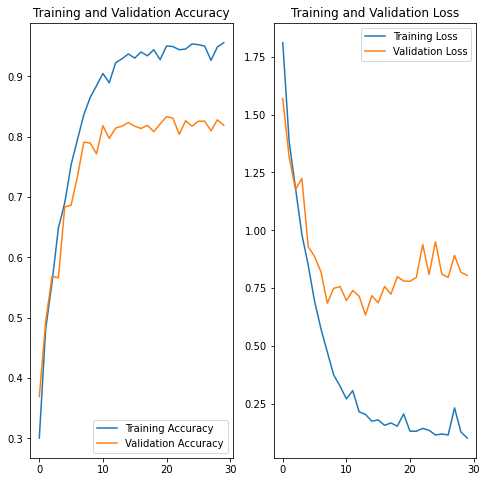

In [48]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Todo:** Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

## **Observations:**
Though there is around 10% difference between training and validation accuracy, there is good increase in validation accuracy compared to previous models.

We can say class rebalance has increased training and validation accuracy to some good extent.
